# **Week02_Challenge1**

Catherine Johanna Rojas Mendoza

A01798149

19/07/24


### Librerías

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Crear el dataframe con los datos proporcionados
data = {
    'Attendance': [80, 65, 95, 95, 85, 75, 90, 65],
    'Homework': [75, 70, 85, 100, 65, 55, 90, 80],
    'Pass': ['yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes'],
    'Reference': ['yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no']
}
df = pd.DataFrame(data)

# Convertir la columna 'Pass' a valores binarios (1 para 'yes' y 0 para 'no')
df['Pass'] = df['Pass'].apply(lambda x: 1 if x == 'yes' else 0)

# Convertir la columna 'Reference' a valores binarios (1 para 'yes' y 0 para 'no')
df['Reference'] = df['Reference'].apply(lambda x: 1 if x == 'yes' else 0)
df


,Attendance,Homework,Pass,Reference
0,80,75,1,1
1,65,70,0,0
2,95,85,1,1
3,95,100,1,0
4,85,65,0,0
5,75,55,0,0
6,90,90,1,1
7,65,80,1,0


### Regresión Logística

Las interpretaciones de la regresión logística sin dividir los datos en entrenamiento y prueba se realizaron con los siguientes parámetros:

- theta0_init = 0
- theta1_init = 0
- alpha = 0.01
- iterations = 1000

In [74]:
# Inicializar parámetros
theta0_init = 0
theta1_init = 0
alpha = 0.001
iterations = 100

In [75]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #h_0

def logistic_regression(X, y, theta0_init, theta1_init, alpha, iterations):
    theta0 = theta0_init
    theta1 = theta1_init
    n = len(y)

    for i in range(iterations):
        z = theta0 + theta1 * X
        h = sigmoid(z)

        # Calcula los gradientes
        gradient0 = (1/n) * np.sum(h - y)
        gradient1 = (1/n) * np.sum((h - y) * X)

        # Actualiza los parámetros
        theta0 -= alpha * gradient0
        theta1 -= alpha * gradient1

        # Calcula el costo
        cost = -1/n * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        print(f"Iteración {i+1}: theta0 = {theta0}, theta1 = {theta1}, alpha = {alpha}, costo = {cost}")

    return theta0, theta1

        #if (i+1) % 100 == 0:
            #print(f"Iteración {i+1}: theta0 = {theta0}, theta1 = {theta1}, alpha = {alpha}, costo = {cost}")

    #return theta0, theta1


### Clasificador que estime si un estudiante aprueba o no el curso

**Característica Attendance**

In [76]:
# Característica 'Attendance'
X_attendance = df['Attendance'].values
y = df['Pass'].values

# Aplicar la regresión logística
theta0_attendance, theta1_attendance = logistic_regression(X_attendance, y, theta0_init, theta1_init, alpha, iterations)

print(f"Parámetros finales para 'Attendance': theta0 = {theta0_attendance}, theta1 = {theta1_attendance}")

# Predicción para cada muestra en el conjunto de datos
z_attendance = theta0_attendance + theta1_attendance * X_attendance

# La función sigmoide convierte los valores en probabilidades, que estarán en el rango de 0 a 1.
y_pred_attendance = sigmoid(z_attendance) >= 0.5


Iteración 1: theta0 = 0.000125, theta1 = 0.0125, alpha = 0.001, costo = 0.6931471805599453
Iteración 2: theta0 = 1.6774744101258067e-05, theta1 = 0.005731771382780238, alpha = 0.001, costo = 0.6626468899832987
Iteración 3: theta0 = 2.7517936758486686e-05, theta1 = 0.008772057291519551, alpha = 0.001, costo = 0.6488738740281816
Iteración 4: theta0 = -1.811919945807841e-05, theta1 = 0.007155822163269516, alpha = 0.001, costo = 0.6467995990723467
Iteración 5: theta0 = -3.429325865979461e-05, theta1 = 0.007971518988365676, alpha = 0.001, costo = 0.6461367044720583
Iteración 6: theta0 = -6.548650301519383e-05, theta1 = 0.007547052419716091, alpha = 0.001, costo = 0.6459785607463455
Iteración 7: theta0 = -8.88939007099455e-05, theta1 = 0.007765355888775023, alpha = 0.001, costo = 0.6459336950088266
Iteración 8: theta0 = -0.0001163073638280061, theta1 = 0.007652889517823268, alpha = 0.001, costo = 0.6459215826568705
Iteración 9: theta0 = -0.00014165080485685857, theta1 = 0.007711316956683345,

- El parámetro theta1 es positivo (0.037), lo que indica que, a medida que aumenta la asistencia (Attendance), la probabilidad de que el estudiante apruebe también aumenta. Sin embargo, el valor de theta1 es bastante pequeño, lo que sugiere que el impacto de la asistencia en la probabilidad de aprobación es bajo.


- El valor de theta0 es negativo (-0.279), lo que implica que, cuando Attendance es 0, la función sigmoide arrojaría una probabilidad menor que 0.5, indicando una tendencia a no aprobar.


**Caracacterística Homework**

In [77]:
# Característica 'Homework'
X_homework = df['Homework'].values

# Aplicar la regresión logística
theta0_homework, theta1_homework = logistic_regression(X_homework, y, theta0_init, theta1_init, alpha, iterations)

print(f"Parámetros finales para 'Homework': theta0 = {theta0_homework}, theta1 = {theta1_homework}")

# Predicción
z_homework = theta0_homework + theta1_homework * X_homework
y_pred_homework = sigmoid(z_homework) >= 0.5


Iteración 1: theta0 = 0.000125, theta1 = 0.015, alpha = 0.001, costo = 0.6931471805599453
Iteración 2: theta0 = -9.888626090384368e-06, theta1 = 0.009365959780589291, alpha = 0.001, costo = 0.6320533494123544
Iteración 3: theta0 = -5.817822262977785e-05, theta1 = 0.010563634054966617, alpha = 0.001, costo = 0.6188651974291306
Iteración 4: theta0 = -0.00012629384015839902, theta1 = 0.010191339646144555, alpha = 0.001, costo = 0.618374102959544
Iteración 5: theta0 = -0.00018830626366062763, theta1 = 0.01030198210747851, alpha = 0.001, costo = 0.6183207801479456
Iteración 6: theta0 = -0.00025212240598776817, theta1 = 0.010269827529988906, alpha = 0.001, costo = 0.6183125413350568
Iteración 7: theta0 = -0.000315397505991416, theta1 = 0.010280462277617532, alpha = 0.001, costo = 0.6183081399915199
Iteración 8: theta0 = -0.00037883358586768967, theta1 = 0.010278324177518708, alpha = 0.001, costo = 0.6183040859837956
Iteración 9: theta0 = -0.00044222103536468733, theta1 = 0.010280003225604722

- El parámetro theta1 es positivo (0.196), lo que indica que a medida que el puntaje de tareas (Homework) aumenta, también lo hace la probabilidad de que el estudiante apruebe. Comparado con Attendance, el valor de theta1 para Homework es más grande, lo que sugiere que esta variable podría tener un mayor impacto en la probabilidad de aprobar.

- El valor de theta0 es negativo (-0.689), lo que nuevamente indica que, con un puntaje de tarea de 0, la probabilidad de aprobar sería baja.


### Métricas de desempeño

- Verdaderos Positivos (TP): Estudiantes que aprueban y el modelo predice correctamente que aprueban.

- Verdaderos Negativos (TN): Estudiantes que no aprueban y el modelo predice correctamente que no aprueban.

- Falsos Positivos (FP): Estudiantes que no aprueban pero el modelo predice incorrectamente que aprueban.

- Falsos Negativos (FN): Estudiantes que aprueban pero el modelo predice incorrectamente que no aprueban.

In [78]:
# Crear la matriz de confusión y calcular las métricas
def confusion_matrix_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1


In [79]:
# Métricas para 'Attendance'
accuracy_attendance, precision_attendance, recall_attendance, f1_attendance = confusion_matrix_metrics(y, y_pred_attendance)

print(f"Métricas para 'Attendance':")
print(f"Accuracy: {accuracy_attendance}")
print(f"Precision: {precision_attendance}")
print(f"Recall: {recall_attendance}")
print(f"F1 Score: {f1_attendance}")


Métricas para 'Attendance':
Accuracy: 0.625
Precision: 0.625
Recall: 1.0
F1 Score: 0.7692307692307693


In [80]:
# Métricas para 'Homework'
accuracy_homework, precision_homework, recall_homework, f1_homework = confusion_matrix_metrics(y, y_pred_homework)

print(f"Métricas para 'Homework':")
print(f"Accuracy: {accuracy_homework}")
print(f"Precision: {precision_homework}")
print(f"Recall: {recall_homework}")
print(f"F1 Score: {f1_homework}")

Métricas para 'Homework':
Accuracy: 0.625
Precision: 0.625
Recall: 1.0
F1 Score: 0.7692307692307693


Los resultados y las predicciones son similares en Attendance y Homework, por lo que las métricas son las mismas.

In [81]:
# Métricas para Reference
accuracy_reference, precision_reference, recall_reference, f1_reference = confusion_matrix_metrics(df['Reference'], y)

print(f"Métricas para la referencia:")
print(f"Accuracy: {accuracy_reference}")
print(f"Precision: {precision_reference}")
print(f"Recall: {recall_reference}")
print(f"F1 Score: {f1_reference}")

Métricas para la referencia:
Accuracy: 0.75
Precision: 0.6
Recall: 1.0
F1 Score: 0.7499999999999999


**¿Cuál es mejor? ¿Le ganan a la referencia?**

- La métrica de Acurracy es mayor en el modelo de Reference (0.75) en comparación con Attendance y Homework. Esto suguiere que Reference predice correctamente si un estudiante aprueba o no en un porcentaje mayor de los casos.

- Precision es ligeramente más alta en Attendance y Homework (0.625) que en Reference (0.6). Esto indica que cuando Attendance y Homework predicen que un estudiante aprobará, estan en lo correcto un 62.5% de las veces comparado con el 60% de Reference.

- El Recall es de 1.0 para los tres modelos. Esto indica que todos los modelos identifican correctamente todos los casos en los que un estudiante aprueba. Sin embargo, un alto Recall acompañado de un menor Precision podría indicar que el modelo esta realizando muchas predicciones positivas, incluso algunas incorrectas.

- El F1 Score balancea Precision y Recall, este es más alto en Attendence y Homework (0.769) en comparación con Reference (0.75). Esto significa que, aunque Reference tiene un mejor Accuracy, los modelos basados en Attendance y Homework tienen un mejor equilibrio entre precisión y sensibilidad.

Si se prioriza el Accuracy y el objetivo es maximizar la cantidad de predicciones correctas en general, el modelo basado en Reference es el mejor. En cambio, si se valora un equilibrio entre Precision y Recall, los modelos basados en Attendance o Homework podrían ser mejores opciones, ya que tienen un F1 Score ligeramente más alto.




### Modelo

Para trabajar os modelos al dividir el conjunto de datos, se optó por manejar los siguientes parámetros:

- theta0_init = 0
- theta1_init = 0
- alpha = 0.001
- iterations = 100

Se decidió obtener el valor de la función de costo de cada iteeración para observar el continuo comportamiento al probar con diferentes parámetros.

La func ión de costo devuelve un valor no negativo, que cuanto menor sea, mejor será el ajuste del modelo a los datos. Si el costo es cercano a 0, significa que el modelo está prediciendo muy bien los resultados. Por el contrario, si el costo es alto, indica que el modelo ésta haciendo muchas predicciones incorrectas y que no se ajusta bien a los datos.

Al probar con una tasa más pequeña pero manteniendo el resto de los parámetros como se menciona, existe una gran cantidad de valoes nan en el valor de la función de costo. Cuando se probo con una tasa mas grande como 0.1, 0.05 y 0.5, el valor del costo era muy lejano a 0.

Cuando se tanteo con las iteraciones mayores a 100, el valor de la función de costo reducia, y volvía a crecer, o en otros casos, se obtenian valores muy altos.

Los parámetros seleccionados, no muestran valores nan y todos son muy cercanos a 0 y van disminuyendo gradualmente, sin emabargo dejan de disminuir significativamente en las primeras iteraciones, lo que puede indicar que el modelo a alcanzado un mínimo local o ha convergido. En este caso, continuar con el entrenamiento quozá no mejore el modelo.



In [82]:
# Dividir el conjunto de datos en entrenamiento
def train_test_split(df, test_size=0.25):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices], df.iloc[test_indices]

# Dividir el conjunto de datos
train_df, test_df = train_test_split(df, test_size=0.25)


In [83]:
# Característica 'Attendance' para el conjunto de entrenamiento
X_attendance_train = train_df['Attendance'].values
y_train_values = train_df['Pass'].values

# Aplicar la regresión logística en el conjunto de entrenamiento
theta0_attendance, theta1_attendance = logistic_regression(X_attendance_train, y_train_values, theta0_init, theta1_init, alpha, iterations)
print(f"Parámetros finales para 'Attendance': theta0 = {theta0_attendance}, theta1 = {theta1_attendance}")

# Evaluar el modelo en el conjunto de prueba para 'Attendance'
X_attendance_test = test_df['Attendance'].values
y_test_values = test_df['Pass'].values
z_attendance_test = theta0_attendance + theta1_attendance * X_attendance_test
y_pred_attendance_test = sigmoid(z_attendance_test) >= 0.5




Iteración 1: theta0 = 0.0003333333333333333, theta1 = 0.028333333333333332, alpha = 0.001, costo = 0.6931471805599452
Iteración 2: theta0 = 0.00025208675024002153, theta1 = 0.021164906717516856, alpha = 0.001, costo = 0.4911277667283197
Iteración 3: theta0 = 0.00022951608454240585, theta1 = 0.018946256483969165, alpha = 0.001, costo = 0.45605994643487024
Iteración 4: theta0 = 0.00023116114839000581, theta1 = 0.018784031746452528, alpha = 0.001, costo = 0.4533676013222499
Iteración 5: theta0 = 0.00023470221207197705, theta1 = 0.018783078766200112, alpha = 0.001, costo = 0.4533543407298557
Iteración 6: theta0 = 0.00023825396961689075, theta1 = 0.018783036201710568, alpha = 0.001, costo = 0.4533543276974191
Iteración 7: theta0 = 0.00024180572835025722, theta1 = 0.018782994449018636, alpha = 0.001, costo = 0.4533543150806408
Iteración 8: theta0 = 0.00024535747873859735, theta1 = 0.018782952697128368, alpha = 0.001, costo = 0.4533543024639223
Iteración 9: theta0 = 0.000248909220773686, thet

In [84]:
# Característica 'Homework' para el conjunto de entrenamiento
X_homework_train = train_df['Homework'].values

# Aplicar la regresión logística en el conjunto de entrenamiento
theta0_homework, theta1_homework = logistic_regression(X_homework_train, y_train_values, theta0_init, theta1_init, alpha, iterations)
print(f"Parámetros finales para 'Homework': theta0 = {theta0_homework}, theta1 = {theta1_homework}")

# Evaluar el modelo en el conjunto de prueba para 'Homework'
X_homework_test = test_df['Homework'].values
z_homework_test = theta0_homework + theta1_homework * X_homework_test
y_pred_homework_test = sigmoid(z_homework_test) >= 0.5


Iteración 1: theta0 = 0.0003333333333333333, theta1 = 0.030416666666666665, alpha = 0.001, costo = 0.6931471805599452
Iteración 2: theta0 = 0.0002452163682669277, theta1 = 0.02579766724899144, alpha = 0.001, costo = 0.411725718035884
Iteración 3: theta0 = 0.000187955971738443, theta1 = 0.02368526602628352, alpha = 0.001, costo = 0.3958708796005844
Iteración 4: theta0 = 0.00014818963579660917, theta1 = 0.02300211406629224, alpha = 0.001, costo = 0.39288117797952016
Iteración 5: theta0 = 0.00011459171663526482, theta1 = 0.022824109717528754, alpha = 0.001, costo = 0.3925843355386902
Iteración 6: theta0 = 8.264627128332796e-05, theta1 = 0.022781525830082944, alpha = 0.001, costo = 0.3925635793349409
Iteración 7: theta0 = 5.110156420009472e-05, theta1 = 0.02277178454373626, alpha = 0.001, costo = 0.3925614508067139
Iteración 8: theta0 = 1.965148713780879e-05, theta1 = 0.022769794870605937, alpha = 0.001, costo = 0.3925604000892998
Iteración 9: theta0 = -1.1776351544951803e-05, theta1 = 0.0

### Prueba de Implementación

Utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica.


In [85]:
# Predecir las salidas del subconjunto de prueba para 'Attendance'
y_pred_attendance_test = sigmoid(theta0_attendance + theta1_attendance * X_attendance_test) >= 0.5

# Predecir las salidas del subconjunto de prueba para 'Homework'
y_pred_homework_test = sigmoid(theta0_homework + theta1_homework * X_homework_test) >= 0.5


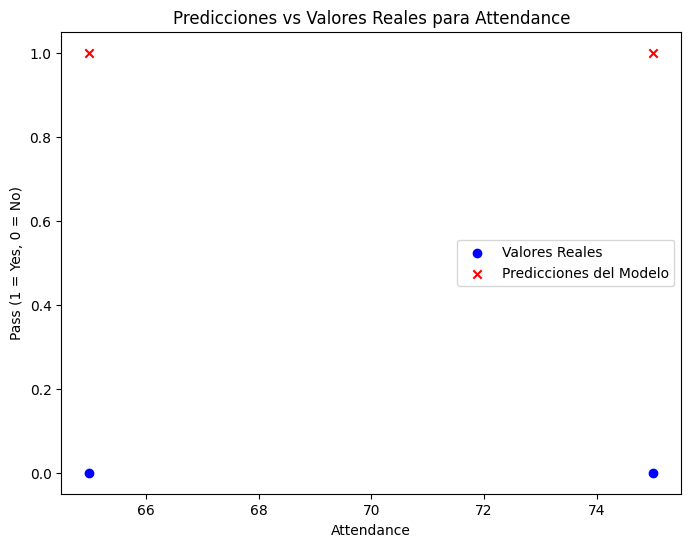

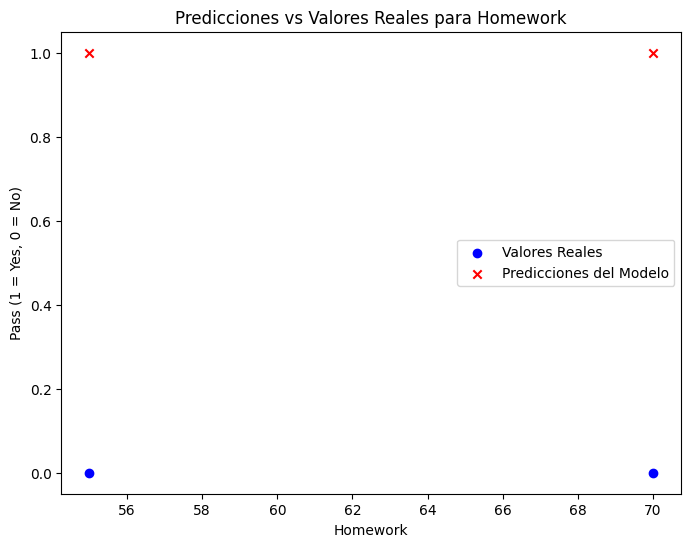

In [86]:
# Graficar los resultados para 'Attendance'
plt.figure(figsize=(8, 6))
plt.scatter(X_attendance_test, y_test_values, color='blue', label='Valores Reales')
plt.scatter(X_attendance_test, y_pred_attendance_test, color='red', marker='x', label='Predicciones del Modelo')
plt.xlabel('Attendance')
plt.ylabel('Pass (1 = Yes, 0 = No)')
plt.title('Predicciones vs Valores Reales para Attendance')
plt.legend()
plt.show()

# Graficar los resultados para 'Homework'
plt.figure(figsize=(8, 6))
plt.scatter(X_homework_test, y_test_values, color='blue', label='Valores Reales')
plt.scatter(X_homework_test, y_pred_homework_test, color='red', marker='x', label='Predicciones del Modelo')
plt.xlabel('Homework')
plt.ylabel('Pass (1 = Yes, 0 = No)')
plt.title('Predicciones vs Valores Reales para Homework')
plt.legend()
plt.show()

En el caso de Attendance, parece que las observaciones con asistencia baja (cerca de 65) no pasan (clase 0), mientras que las observaciones con asistencia mayor (cerca de 75) pasan (clase 1). En este caso, el modelo predice correctamente las observaciones, ya que las cruces rojas se superponen a los puntos azules correspondientes.

Para la variable Homework, las observaciones más bajas (cerca de 55) no pasan (clase 0) y las observaciones con puntajes más altos (cerca de 70) pasan (clase 1). Similar a Attendance, el modelo predice correctamente las observaciones en este caso, con las cruces rojas superpuestas a los puntos azules.

###  Valor de la función de costo para el subconjunto de entrenamiento, y para el subconjunto de prueba.

In [87]:
# Función de costo
def compute_cost(X, y, theta0, theta1):
    n = len(y)
    z = theta0 + theta1 * X
    h = sigmoid(z)
    cost = -1/n * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [88]:
# Calcular la función de costo para el conjunto de entrenamiento y prueba para 'Attendance'
train_cost_attendance = compute_cost(X_attendance_train, y_train_values, theta0_attendance, theta1_attendance)
test_cost_attendance = compute_cost(X_attendance_test, y_test_values, theta0_attendance, theta1_attendance)
print(f"Función de costo para 'Attendance' - Entrenamiento: {train_cost_attendance}, Prueba: {test_cost_attendance}")


Función de costo para 'Attendance' - Entrenamiento: 0.45335312936845834, Prueba: 1.5536369948909567


In [89]:
# Calcular la función de costo para el conjunto de entrenamiento y prueba para 'Homework'
train_cost_homework = compute_cost(X_homework_train, y_train_values, theta0_homework, theta1_homework)
test_cost_homework = compute_cost(X_homework_test, y_test_values, theta0_homework, theta1_homework)
print(f"Función de costo para 'Homework' - Entrenamiento: {train_cost_homework}, Prueba: {test_cost_homework}")

Función de costo para 'Homework' - Entrenamiento: 0.3924685829815997, Prueba: 1.6407157462830257


Tanto en Attendance y Homework, la función del costo en el conjunto de prueba es significativamente mayor que en el conjunto de entrenamiento. Esto sugiere  que el modelo puede estar sobreajustado (overfitting) a los datos de entrenamiento. En otras palabras, el modelo ha aprendido a predecir muy bien los ejemplos en el conjunto de entrenamiento, pero no generaliza bien a ejemplos nuevos que no ha visto antes, como los del conjunto de prueba.

### Métricas de desempeño

In [90]:
# Métricas para 'Attendance'
attendance_accuracy, attendance_precision, attendance_recall, attendance_f1 = confusion_matrix_metrics(y_test_values, y_pred_attendance_test)

print(f"Métricas para 'Attendance':")
print(f"Accuracy: {attendance_accuracy}")
print(f"Precision: {attendance_precision}")
print(f"Recall: {attendance_recall}")
print(f"F1 Score: {attendance_f1}")


Métricas para 'Attendance':
Accuracy: 0.0
Precision: 0.0
Recall: 0
F1 Score: 0


In [91]:
# Métricas para 'Homework'
homework_accuracy, homework_precision, homework_recall, homework_f1 = confusion_matrix_metrics(y_test_values, y_pred_homework_test)

print(f"Métricas para 'Homework':")
print(f"Accuracy: {homework_accuracy}")
print(f"Precision: {homework_precision}")
print(f"Recall: {homework_recall}")
print(f"F1 Score: {homework_f1}")


Métricas para 'Homework':
Accuracy: 0.0
Precision: 0.0
Recall: 0
F1 Score: 0


In [92]:
# Métricas para Reference
accuracy_reference, precision_reference, recall_reference, f1_reference = confusion_matrix_metrics(df['Reference'], y)

print(f"Métricas para la referencia:")
print(f"Accuracy: {accuracy_reference}")
print(f"Precision: {precision_reference}")
print(f"Recall: {recall_reference}")
print(f"F1 Score: {f1_reference}")

Métricas para la referencia:
Accuracy: 0.75
Precision: 0.6
Recall: 1.0
F1 Score: 0.7499999999999999


**¿Cuál es mejor? ¿Le ganan a la referencia?**

Los clasificadores basados en Attendance y Homework son claramente inferiores al clasificador de referencia. Ninguna de las métricas para Attendance o Homework es positiva, lo que indica que estos modelos no pueden hacer predicciones útiles.
El clasificador basado en la referencia es significativamente mejor que los otros dos modelos en términos de todas las métricas importantes.



# Exportar a PDF

In [94]:
!jupyter nbconvert --to html "/content/drive/MyDrive/ColabNotebooks/Week02_Challenge1.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/Week02_Challenge1.ipynb to html
[NbConvertApp] Writing 780591 bytes to /content/drive/MyDrive/ColabNotebooks/Week02_Challenge1.html
